___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using algorithms ***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', index_col = 0)

/home/navarra/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


### Data Wrangling
Take info

In [3]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
for i in df.columns:
    print(i, df[i].nunique())

Clothing ID 1206
Age 77
Title 13993
Review Text 22634
Rating 5
Recommended IND 2
Positive Feedback Count 82
Division Name 3
Department Name 6
Class Name 20


In [5]:
df.shape

(23486, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [7]:
df[df['Review Text'].isnull()]['Positive Feedback Count'].value_counts(dropna = False)

0    845
Name: Positive Feedback Count, dtype: int64

In [8]:
df[df['Review Text'].isnull()]['Recommended IND'].value_counts(dropna = False)

1    774
0     71
Name: Recommended IND, dtype: int64

In [9]:
df[df['Review Text'].isnull()]['Title'].value_counts(dropna = False)

NaN                        844
Such a beautiful dress!      1
Name: Title, dtype: int64

In [10]:
df[(df['Review Text'].isnull()) & (df['Recommended IND'] == 1)]['Clothing ID'].value_counts()

1078    34
862     25
872     25
1081    20
895     19
        ..
382      1
380      1
379      1
370      1
539      1
Name: Clothing ID, Length: 237, dtype: int64

In [11]:
df[(df['Review Text'].notnull()) & (df['Recommended IND'] == 1)]['Clothing ID'].value_counts()

1078    807
862     636
1094    603
1081    474
872     453
       ... 
568       1
488       1
344       1
328       1
16        1
Name: Clothing ID, Length: 1081, dtype: int64

In [12]:
df[df['Review Text'].notnull()]['Clothing ID'].value_counts(dropna = False)

1078    987
862     778
1094    735
1081    561
872     519
       ... 
792       1
776       1
744       1
728       1
16        1
Name: Clothing ID, Length: 1179, dtype: int64

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [13]:
df.head(2)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses


<AxesSubplot:>

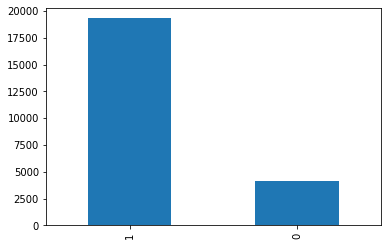

In [14]:
df['Recommended IND'].value_counts().plot.bar()

<AxesSubplot:>

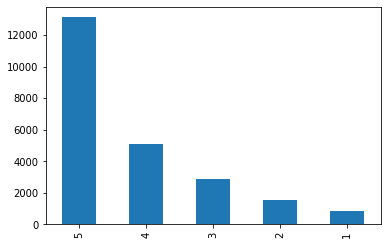

In [15]:
df['Rating'].value_counts().plot.bar()

In [16]:
df[(df['Recommended IND'] == 1)]['Rating'].value_counts()

5    13106
4     4909
3     1189
2       94
1       16
Name: Rating, dtype: int64

In [17]:
df[(df['Recommended IND'] == 0)]['Rating'].value_counts()

3    1682
2    1471
1     826
4     168
5      25
Name: Rating, dtype: int64

In [18]:
df['Positive Feedback Count'].value_counts()

0     11176
1      4043
2      2193
3      1433
4       922
      ...  
52        1
56        1
61        1
99        1
95        1
Name: Positive Feedback Count, Length: 82, dtype: int64

In [19]:
df[(df['Recommended IND'] == 0)]['Positive Feedback Count'].sum()

14114

In [20]:
df[(df['Recommended IND'] == 0) & (df['Positive Feedback Count'] > 50)]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
657,634,65,"Loungewear, not outdoor wear",So i recognized the fact that this dress was l...,2,0,55,General Petite,Intimate,Lounge
1156,1094,39,Disappointed,I fell in love with this dress the instant i s...,3,0,55,General Petite,Dresses,Dresses
1167,1060,41,NaN,This would be perfect if only it were lined!!!...,3,0,71,General Petite,Bottoms,Pants
2382,1110,56,Pretty fabric but needs serious pressing,This dress arrived today in such a crumpled an...,3,0,77,General,Dresses,Dresses
3787,1091,63,Large and thin,I bought this for an upcoming conference and w...,3,0,82,General,Dresses,Dresses
7765,986,43,Quality does not merit cost,"I generally don't write bad reviews, but there...",1,0,108,General,Jackets,Jackets
10068,1081,52,Runs really small,I'm 5 feet 120 and hourglass figure. i literal...,2,0,57,General Petite,Dresses,Dresses
13937,1110,44,"Awkward, not as pictured",I purchased the 0p online and it was so incred...,3,0,51,General Petite,Dresses,Dresses
17568,1110,47,"Beautiful embroidery, poor execution",I loved this dress. the details in the embroid...,4,0,51,General,Dresses,Dresses
23427,854,42,Sheer shirt,What drew me to this shirt was the beautiful s...,2,0,65,General Petite,Tops,Knits


In [21]:
df[(df['Recommended IND'] == 1)]['Positive Feedback Count'].sum()

45445

In [22]:
df[(df['Recommended IND'] == 1) & (df['Positive Feedback Count'] > 50)]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
688,1087,52,Worth it,"I never buy anything at retailer full price, b...",5,1,84,General,Dresses,Dresses
1274,1095,45,Beautiful,The rose color is lighter than the photo of th...,4,1,65,General,Dresses,Dresses
1294,1095,29,NaN,I've been on the hunt for the perfect dress to...,5,1,117,General,Dresses,Dresses
2042,1072,33,Effortlessly cool,I will preface this review by stating that thi...,5,1,51,General,Dresses,Dresses
2123,1072,39,Another tiny success,Tiny are experts at making busy bohemian shirt...,5,1,94,General Petite,Dresses,Dresses
2402,1110,34,Refreshing green,This dress is even better in person. the base ...,5,1,61,General,Dresses,Dresses
3378,883,56,Lace inset is see through-runs large-loved mauve,I loved the mauve color! i loved the idea of t...,4,1,57,General,Tops,Knits
3470,1056,57,Comfy and classic,"1. i'm 5'5"" tall, 145 lbs, and 38-32-40 and th...",5,1,66,General Petite,Bottoms,Pants
4410,1081,63,Cute and flattering!,"Ordered this in the orange (black, white and t...",5,1,81,General Petite,Dresses,Dresses
4561,820,39,Really comfy and can be worn almost year round,This is a super comfy and adorable shirt. got ...,5,1,58,General,Tops,Blouses


---
---


## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [24]:
df.drop('Title', axis = 1, inplace = True)

In [25]:
df.dropna(inplace = True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22628 entries, 0 to 23485
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              22628 non-null  int64 
 1   Age                      22628 non-null  int64 
 2   Review Text              22628 non-null  object
 3   Rating                   22628 non-null  int64 
 4   Recommended IND          22628 non-null  int64 
 5   Positive Feedback Count  22628 non-null  int64 
 6   Division Name            22628 non-null  object
 7   Department Name          22628 non-null  object
 8   Class Name               22628 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.7+ MB


In [27]:
df = df[['Review Text', 'Recommended IND']]

In [28]:
df.head(2)

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22628 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review Text      22628 non-null  object
 1   Recommended IND  22628 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 530.3+ KB


### Missing Value Detection

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization

In [30]:
from nltk.tokenize import word_tokenize

In [31]:
df['Sentences'] = df['Review Text'].str.lower().apply(word_tokenize)

In [32]:
df.head()

,Review Text,Recommended IND,Sentences
0,Absolutely wonderful - silky and sexy and comf...,1,"[absolutely, wonderful, -, silky, and, sexy, a..."
1,Love this dress! it's sooo pretty. i happene...,1,"[love, this, dress, !, it, 's, sooo, pretty, ...."
2,I had such high hopes for this dress and reall...,0,"[i, had, such, high, hopes, for, this, dress, ..."
3,"I love, love, love this jumpsuit. it's fun, fl...",1,"[i, love, ,, love, ,, love, this, jumpsuit, .,..."
4,This shirt is very flattering to all due to th...,1,"[this, shirt, is, very, flattering, to, all, d..."


### Noise Removal

In [33]:
from nltk.corpus import stopwords

In [34]:
sw = stopwords.words('english')

In [35]:
def noise_removal(data):
  
    tokens_without_punc = [w for w in data if w.isalpha()]
    
    tokens_without_sw = [w for w in tokens_without_punc if w not in sw]
    
    return tokens_without_sw

In [36]:
df['Sentences'] = df['Sentences'].apply(noise_removal)

In [37]:
df.head()

,Review Text,Recommended IND,Sentences
0,Absolutely wonderful - silky and sexy and comf...,1,"[absolutely, wonderful, silky, sexy, comfortable]"
1,Love this dress! it's sooo pretty. i happene...,1,"[love, dress, sooo, pretty, happened, find, st..."
2,I had such high hopes for this dress and reall...,0,"[high, hopes, dress, really, wanted, work, ini..."
3,"I love, love, love this jumpsuit. it's fun, fl...",1,"[love, love, love, jumpsuit, fun, flirty, fabu..."
4,This shirt is very flattering to all due to th...,1,"[shirt, flattering, due, adjustable, front, ti..."


### Lexicon Normalization

In [39]:
from nltk.stem import WordNetLemmatizer

In [40]:
lem = WordNetLemmatizer()

In [41]:
df['Sentences'] = df['Sentences'].apply(lambda x: list(lem.lemmatize(i) for i in x))

In [42]:
df.head()

,Review Text,Recommended IND,Sentences
0,Absolutely wonderful - silky and sexy and comf...,1,"[absolutely, wonderful, silky, sexy, comfortable]"
1,Love this dress! it's sooo pretty. i happene...,1,"[love, dress, sooo, pretty, happened, find, st..."
2,I had such high hopes for this dress and reall...,0,"[high, hope, dress, really, wanted, work, init..."
3,"I love, love, love this jumpsuit. it's fun, fl...",1,"[love, love, love, jumpsuit, fun, flirty, fabu..."
4,This shirt is very flattering to all due to th...,1,"[shirt, flattering, due, adjustable, front, ti..."


---
---


## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [43]:
df.shape

(22628, 3)

In [44]:
df[df['Recommended IND'] == 1]

,Review Text,Recommended IND,Sentences
0,Absolutely wonderful - silky and sexy and comf...,1,"[absolutely, wonderful, silky, sexy, comfortable]"
1,Love this dress! it's sooo pretty. i happene...,1,"[love, dress, sooo, pretty, happened, find, st..."
3,"I love, love, love this jumpsuit. it's fun, fl...",1,"[love, love, love, jumpsuit, fun, flirty, fabu..."
4,This shirt is very flattering to all due to th...,1,"[shirt, flattering, due, adjustable, front, ti..."
6,I aded this in my basket at hte last mintue to...,1,"[aded, basket, hte, last, mintue, see, would, ..."
...,...,...,...
23479,So i wasn't sure about ordering this skirt bec...,1,"[sure, ordering, skirt, could, see, person, fi..."
23481,I was very happy to snag this dress at such a ...,1,"[happy, snag, dress, great, price, easy, slip,..."
23482,"It reminds me of maternity clothes. soft, stre...",1,"[reminds, maternity, clothes, soft, stretchy, ..."
23484,I bought this dress for a wedding i have this ...,1,"[bought, dress, wedding, summer, cute, unfortu..."


In [45]:
df[df['Recommended IND'] == 0]

,Review Text,Recommended IND,Sentences
2,I had such high hopes for this dress and reall...,0,"[high, hope, dress, really, wanted, work, init..."
5,"I love tracy reese dresses, but this one is no...",0,"[love, tracy, reese, dress, one, petite, foot,..."
10,Dress runs small esp where the zipper area run...,0,"[dress, run, small, esp, zipper, area, run, or..."
22,"First of all, this is not pullover styling. th...",0,"[first, pullover, styling, side, zipper, would..."
25,"Loved the material, but i didnt really look at...",0,"[loved, material, didnt, really, look, long, d..."
...,...,...,...
23449,I tried these on because the color is really p...,0,"[tried, color, really, pretty, fun, want, pair..."
23450,I wanted to love this jacket. so soft and grea...,0,"[wanted, love, jacket, soft, great, color, unf..."
23460,I purchased this for a very good price and i t...,0,"[purchased, good, price, typically, love, maev..."
23478,I was surprised at the positive reviews for th...,0,"[surprised, positive, review, product, terribl..."


### Collect Words (positive and negative separately)

In [46]:
df_pos = df[df['Recommended IND'] == 1]['Sentences'].apply(lambda x : ' '.join(x))

In [47]:
df_pos

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store gla...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
6        aded basket hte last mintue see would look lik...
                               ...                        
23479    sure ordering skirt could see person first gla...
23481    happy snag dress great price easy slip flatter...
23482    reminds maternity clothes soft stretchy shiny ...
23484    bought dress wedding summer cute unfortunately...
23485    dress lovely platinum feminine fit perfectly e...
Name: Sentences, Length: 18527, dtype: object

In [48]:
df_neg = df[df['Recommended IND'] == 0]['Sentences'].apply(lambda x : ' '.join(x))

In [49]:
df_neg

2        high hope dress really wanted work initially o...
5        love tracy reese dress one petite foot tall us...
10       dress run small esp zipper area run ordered sp...
22       first pullover styling side zipper would purch...
25       loved material didnt really look long dress pu...
                               ...                        
23449    tried color really pretty fun want pair pant l...
23450    wanted love jacket soft great color unfortunat...
23460    purchased good price typically love maeve fabr...
23478    surprised positive review product terrible cut...
23483    fit well top see never would worked glad able ...
Name: Sentences, Length: 4101, dtype: object

In [60]:
X = df['Sentences'].apply(lambda x : ' '.join(x))

In [61]:
X

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store gla...
2        high hope dress really wanted work initially o...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
                               ...                        
23481    happy snag dress great price easy slip flatter...
23482    reminds maternity clothes soft stretchy shiny ...
23483    fit well top see never would worked glad able ...
23484    bought dress wedding summer cute unfortunately...
23485    dress lovely platinum feminine fit perfectly e...
Name: Sentences, Length: 22628, dtype: object

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [46]:
from wordcloud import WordCloud

In [62]:
wordcloud = WordCloud(background_color = 'white', max_words = 500).generate(' '.join(X))

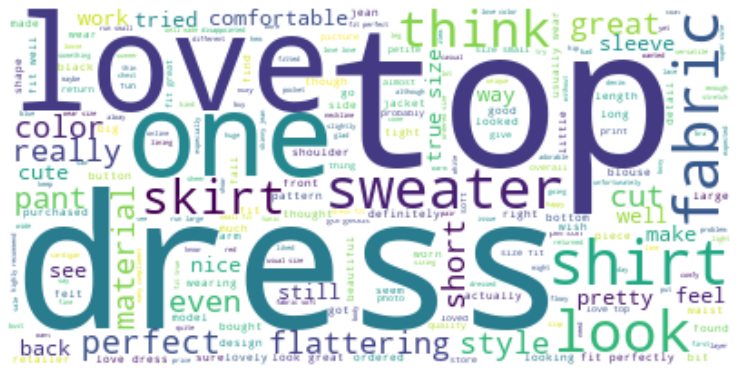

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13, 13))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

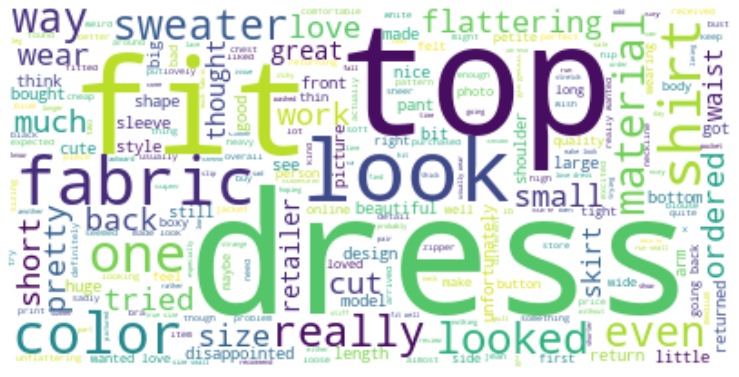

In [64]:
wordcloud_neg = WordCloud(background_color = 'white', max_words = 500).generate(' '.join(df_neg))
plt.figure(figsize = (13, 13))
plt.imshow(wordcloud_neg, interpolation = 'bilinear')
plt.axis('off')
plt.show()

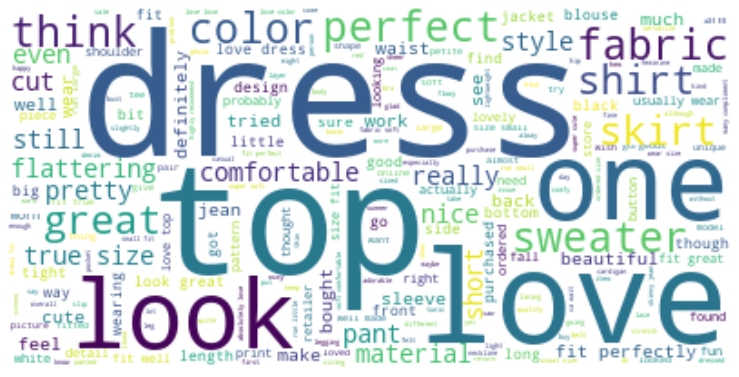

In [65]:
wordcloud_pos = WordCloud(background_color = 'white', max_words = 500).generate(' '.join(df_pos))
plt.figure(figsize = (13, 13))
plt.imshow(wordcloud_pos, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## 5. Sentiment Classification with Machine Learning

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting.

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [60]:
df.head()

,Review Text,Recommended IND,Sentences
0,Absolutely wonderful - silky and sexy and comf...,1,"[absolutely, wonderful, silky, sexy, comfortable]"
1,Love this dress! it's sooo pretty. i happene...,1,"[love, dress, sooo, pretty, happened, find, st..."
2,I had such high hopes for this dress and reall...,0,"[high, hope, dress, really, wanted, work, init..."
3,"I love, love, love this jumpsuit. it's fun, fl...",1,"[love, love, love, jumpsuit, fun, flirty, fabu..."
4,This shirt is very flattering to all due to th...,1,"[shirt, flattering, due, adjustable, front, ti..."


In [62]:
X = df['Sentences'].apply(lambda x : ' '.join(x))
y = df['Recommended IND']

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In the next step we create a numerical feature vector for each document:

### Vectorization

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
vec = CountVectorizer()
X_train_vec = vec.fit_transform(X_train)
X_test_vec = vec.transform(X_test)

### TF-IDF

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [113]:
idf = TfidfVectorizer()
X_train_tf = idf.fit_transform(X_train)
X_test_tf = idf.transform(X_test)

### Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression

In [69]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [101]:
model_log = LogisticRegression().fit(X_train_vec, y_train)

y_pred_vec = model_log.predict(X_test_vec)

print(confusion_matrix(y_test, y_pred_vec))

print(classification_report(y_test, y_pred_vec))

log_vec_f1 = f1_score(y_test, y_pred_vec)
print(log_vec_f1)

[[ 488  357]
 [ 178 3503]]
              precision    recall  f1-score   support

           0       0.73      0.58      0.65       845
           1       0.91      0.95      0.93      3681

    accuracy                           0.88      4526
   macro avg       0.82      0.76      0.79      4526
weighted avg       0.87      0.88      0.88      4526

0.9290545020554303


/home/navarra/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [100]:
model_log = LogisticRegression().fit(X_train_tf, y_train)

y_pred_tf = model_log.predict(X_test_tf)

print(confusion_matrix(y_test, y_pred_tf))

print(classification_report(y_test, y_pred_tf))

log_tf_f1 = f1_score(y_test, y_pred_tf)
print(log_tf_f1)

[[ 423  422]
 [ 117 3564]]
              precision    recall  f1-score   support

           0       0.78      0.50      0.61       845
           1       0.89      0.97      0.93      3681

    accuracy                           0.88      4526
   macro avg       0.84      0.73      0.77      4526
weighted avg       0.87      0.88      0.87      4526

0.9296987087517934


### Naive Bayes 



In [67]:
from sklearn.naive_bayes import MultinomialNB

In [70]:
model_nb = MultinomialNB().fit(X_train_vec, y_train)

y_pred_vec = model_nb.predict(X_test_vec)

print(confusion_matrix(y_test, y_pred_vec))

print(classification_report(y_test, y_pred_vec))

nb_vec_f1 = f1_score(y_test, y_pred_vec)
print(nb_vec_f1)

[[ 572  273]
 [ 222 3459]]
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       845
           1       0.93      0.94      0.93      3681

    accuracy                           0.89      4526
   macro avg       0.82      0.81      0.82      4526
weighted avg       0.89      0.89      0.89      4526

0.9332254148118171


In [105]:
model_nb = MultinomialNB().fit(X_train_tf, y_train)

y_pred_tf = model_nb.predict(X_test_tf)

print(confusion_matrix(y_test, y_pred_tf))

print(classification_report(y_test, y_pred_tf))

nb_tf_f1 = f1_score(y_test, y_pred_tf)
print(nb_tf_f1)

[[  37  808]
 [   2 3679]]
              precision    recall  f1-score   support

           0       0.95      0.04      0.08       845
           1       0.82      1.00      0.90      3681

    accuracy                           0.82      4526
   macro avg       0.88      0.52      0.49      4526
weighted avg       0.84      0.82      0.75      4526

0.9008325171400587


### Support Vector Machine (SVM)

In [106]:
from sklearn.svm import SVC

In [103]:
model_svm = SVC().fit(X_train_vec, y_train)

y_pred_vec = model_svm.predict(X_test_vec)

print(confusion_matrix(y_test, y_pred_vec))

print(classification_report(y_test, y_pred_vec))

svm_vec_f1 = f1_score(y_test, y_pred_vec)
print(svm_vec_f1)

[[ 434  411]
 [ 110 3571]]
              precision    recall  f1-score   support

           0       0.80      0.51      0.62       845
           1       0.90      0.97      0.93      3681

    accuracy                           0.88      4526
   macro avg       0.85      0.74      0.78      4526
weighted avg       0.88      0.88      0.87      4526

0.9320109617643222


In [107]:
model_svm = SVC().fit(X_train_tf, y_train)

y_pred_tf = model_svm.predict(X_test_tf)

print(confusion_matrix(y_test, y_pred_tf))

print(classification_report(y_test, y_pred_tf))

svm_tf_f1 = f1_score(y_test, y_pred_tf)
print(svm_tf_f1)

[[ 435  410]
 [ 113 3568]]
              precision    recall  f1-score   support

           0       0.79      0.51      0.62       845
           1       0.90      0.97      0.93      3681

    accuracy                           0.88      4526
   macro avg       0.85      0.74      0.78      4526
weighted avg       0.88      0.88      0.87      4526

0.9317143230186707


### Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
model_rf = RandomForestClassifier().fit(X_train_vec, y_train)

y_pred_vec = model_rf.predict(X_test_vec)

print(confusion_matrix(y_test, y_pred_vec))

print(classification_report(y_test, y_pred_vec))

rf_vec_f1 = f1_score(y_test, y_pred_vec)
print(rf_vec_f1)

[[ 198  647]
 [  30 3651]]
              precision    recall  f1-score   support

           0       0.87      0.23      0.37       845
           1       0.85      0.99      0.92      3681

    accuracy                           0.85      4526
   macro avg       0.86      0.61      0.64      4526
weighted avg       0.85      0.85      0.81      4526

0.9151522747211429


In [115]:
model_rf = RandomForestClassifier().fit(X_train_tf, y_train)

y_pred_tf = model_rf.predict(X_test_tf)

print(confusion_matrix(y_test, y_pred_tf))

print(classification_report(y_test, y_pred_tf))

rf_tf_f1 = f1_score(y_test, y_pred_tf)
print(rf_tf_f1)

[[ 181  664]
 [  28 3653]]
              precision    recall  f1-score   support

           0       0.87      0.21      0.34       845
           1       0.85      0.99      0.91      3681

    accuracy                           0.85      4526
   macro avg       0.86      0.60      0.63      4526
weighted avg       0.85      0.85      0.81      4526

0.913478369592398


### Ada  Boosting

In [116]:
from sklearn.ensemble import AdaBoostClassifier

In [117]:
model_ada = AdaBoostClassifier().fit(X_train_vec, y_train)

y_pred_vec = model_ada.predict(X_test_vec)

print(confusion_matrix(y_test, y_pred_vec))

print(classification_report(y_test, y_pred_vec))

ada_vec_f1 = f1_score(y_test, y_pred_vec)
print(ada_vec_f1)

[[ 366  479]
 [ 170 3511]]
              precision    recall  f1-score   support

           0       0.68      0.43      0.53       845
           1       0.88      0.95      0.92      3681

    accuracy                           0.86      4526
   macro avg       0.78      0.69      0.72      4526
weighted avg       0.84      0.86      0.84      4526

0.9153956459392516


In [118]:
model_ada = AdaBoostClassifier().fit(X_train_tf, y_train)

y_pred_ada = model_rf.predict(X_test_tf)

print(confusion_matrix(y_test, y_pred_tf))

print(classification_report(y_test, y_pred_tf))

ada_tf_f1 = f1_score(y_test, y_pred_tf)
print(ada_tf_f1)

[[ 181  664]
 [  28 3653]]
              precision    recall  f1-score   support

           0       0.87      0.21      0.34       845
           1       0.85      0.99      0.91      3681

    accuracy                           0.85      4526
   macro avg       0.86      0.60      0.63      4526
weighted avg       0.85      0.85      0.81      4526

0.913478369592398


### Compare Models Accuracies and F1 Scores

(0.0, 0.99)

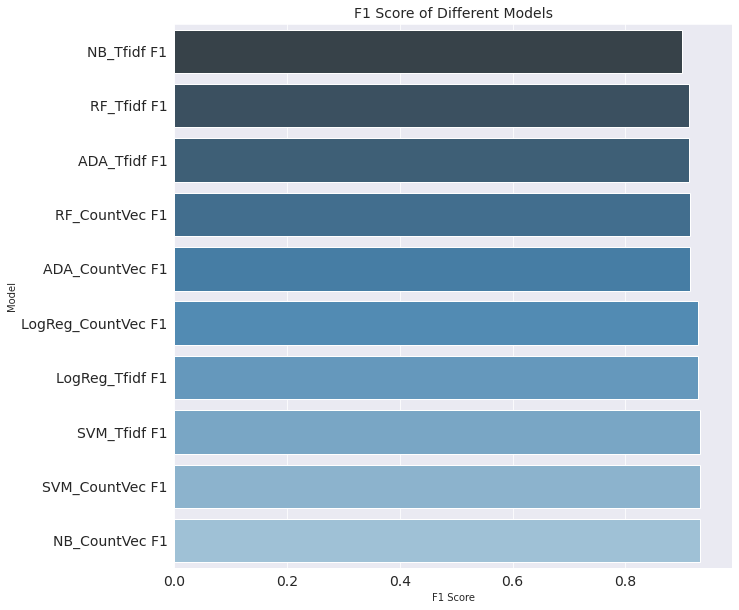

In [159]:
sns.set_style('darkgrid')
compare = pd.DataFrame({"Model": ["LogReg_CountVec F1", "LogReg_Tfidf F1", "NB_CountVec F1", "NB_Tfidf F1",
                                  "SVM_CountVec F1","SVM_Tfidf F1","RF_CountVec F1", "RF_Tfidf F1",
                                  "ADA_CountVec F1", "ADA_Tfidf F1"],
                        "F1 Score": [log_vec_f1, log_tf_f1, nb_vec_f1, nb_tf_f1, svm_vec_f1, 
                                     svm_tf_f1, rf_vec_f1, rf_tf_f1, ada_vec_f1, ada_tf_f1]})
compare = compare.sort_values(by="F1 Score", ascending=True)
plt.figure(figsize=(10,10))
ax = sns.barplot(x="F1 Score", y="Model", data=compare, palette="Blues_d")
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("F1 Score of Different Models", size=14)
ax.set_xlim(.0, .99)

### Conclusion

This project was aimed to used sentiment analysis to determined product recommendation. We started with the data engineering and text mining, which cover change text into tokens, remove punctuation, numbers, stop words and normalization them by using lemmatization. Following we used bag of words model to convert the text into numerical feature vectors. Finally we started training 5 different Classification models and we got the best accuracy of 0.88 for Logistic Regression method. 

In [84]:
import pickle

pickle.dump(model_nb, open('model_nb', 'wb'))

In [85]:
nb_model = pickle.load(open('model_nb', 'rb'))

In [86]:
comment = 'This dress very bad, I dont like it'

In [87]:
comment_s = pd.Series(comment)

In [88]:
vect = CountVectorizer()
vect.fit(X_train)

CountVectorizer()

In [89]:
transformed_comment = vect.transform(comment_s)

In [90]:
pd.DataFrame(transformed_comment.toarray())

,0,1,2,3,4,5,6,7,8,9,...,10807,10808,10809,10810,10811,10812,10813,10814,10815,10816
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
nb_model.predict(transformed_comment)

array([0])

In [92]:
comment2 = 'Look good, i like this dress'

In [93]:
comment2_s = pd.Series(comment2)

vect = CountVectorizer()
vect.fit(X_train)

transformed_comment2 = vect.transform(comment2_s)

pd.DataFrame(transformed_comment2.toarray())

,0,1,2,3,4,5,6,7,8,9,...,10807,10808,10809,10810,10811,10812,10813,10814,10815,10816
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
nb_model.predict(transformed_comment2)

array([1])

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___